In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [42]:
def add_noise(data, noise_level):
    noise = noise_level * (np.random.randn(*data.shape) + 1j * np.random.randn(*data.shape))
    return data + noise

In [43]:
def compute_SV(data):
    # Compute singular values for all matrices in array1
    sv_arr = np.zeros((0, 4))
    for i, matrix in enumerate(data):
        if not np.isnan(matrix).any():
            U, s, Vt = np.linalg.svd(matrix)
            sv_arr = np.vstack([sv_arr, s])
    return sv_arr


In [44]:
def clustering_alg(data: np.ndarray, n_clusters = 2):

    data_arr = data / np.mean(np.abs(data).flatten())

    # Determine number of clusters (for example, 1 cluster per 50 samples)
    

    sv_arr = np.zeros((0, 4))

    # Compute singular values for all matrices in data_arr
    for i, matrix in enumerate(data_arr):
        if not np.isnan(matrix).any():
            U, s, Vt = np.linalg.svd(matrix)
            sv_arr = np.vstack([sv_arr, s])

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(sv_arr**2)
    return kmeans.labels_, kmeans.cluster_centers_

In [45]:
# Buggy not working produces naans
def regularize_data(data):
    return data / np.mean(np.abs(data).flatten())

In [46]:
def plot_SV(sv_data, labels = None):
    if labels is None:
        labels = np.zeros(sv_data.shape[0], dtype=int)
        
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
    axes = axes.ravel()
    for col in range(4):
        ax = axes[col]
        for label in np.unique(labels):
            idx = labels == label
            ax.semilogy(np.where(idx)[0], sv_data[idx, col], '.', label=f'Cluster {label}', alpha=0.6, markersize=4)
        ax.set_title(f'Singular Value {col+1}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Sample Index', fontsize=10)
        ax.set_ylabel('Singular Value', fontsize=10)
        ax.grid(True, which='both', ls='--', alpha=0.3)
        ax.legend(loc='best', fontsize=9)
    
    plt.tight_layout()
    plt.show()

In [47]:
def plot_Capacity(capacity_data, labels = None):
    if labels is None:
        labels = np.zeros(capacity_data.shape[0], dtype=int)
    for label in np.unique(labels):
        idx = labels == label
        plt.plot(np.where(idx)[0], (capacity_data[idx]), '.', label=f'Cluster {label}')
    plt.legend()
    plt.show()


In [48]:
def capacity_from_Hmatrix(H: np.ndarray, signal_to_noise_ratio: float) -> float:
    """Calculate channel capacity from channel matrix H.

    Args:
        H (np.ndarray): Channel matrix.
        signal_to_noise_ratio (float): Signal-to-noise ratio.

    Returns:
        float: Estimated channel capacity.
    """
    N_t = 4
    return np.log2(np.linalg.det(np.eye(H.shape[0]) + (signal_to_noise_ratio)/N_t * H @ H.conj().T))

In [49]:
def capacity_Vector(H_matrices):
    capacity_arr = np.zeros(len(H_matrices))
    for i, matrix in enumerate(H_matrices):
        if not np.isnan(matrix).any():
            cap = capacity_from_Hmatrix(H_matrices[i], 10)
            capacity_arr[i] = cap
    return capacity_arr

## Actual clustering

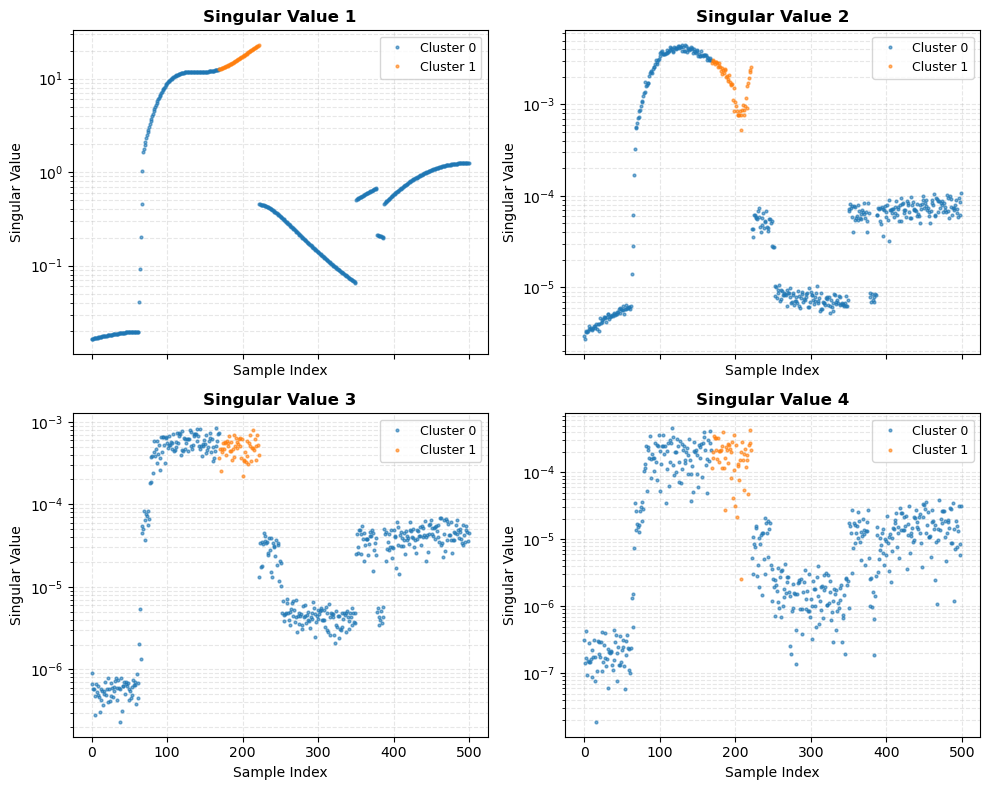

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


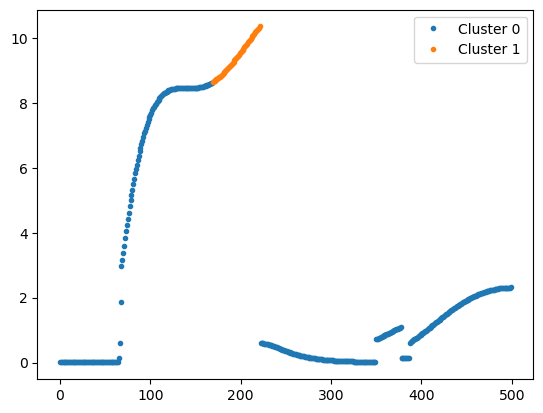

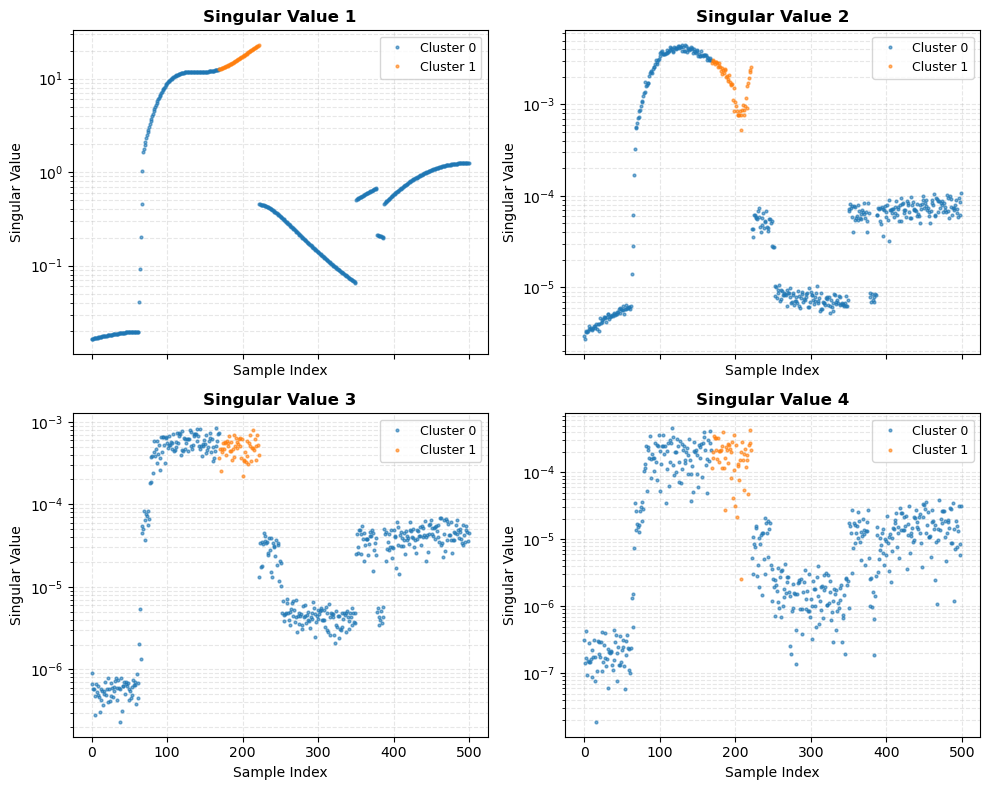

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


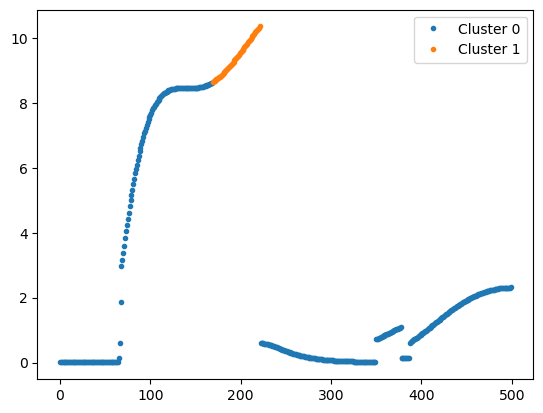

Original number of samples: 500
Number of samples after cleaning: 447


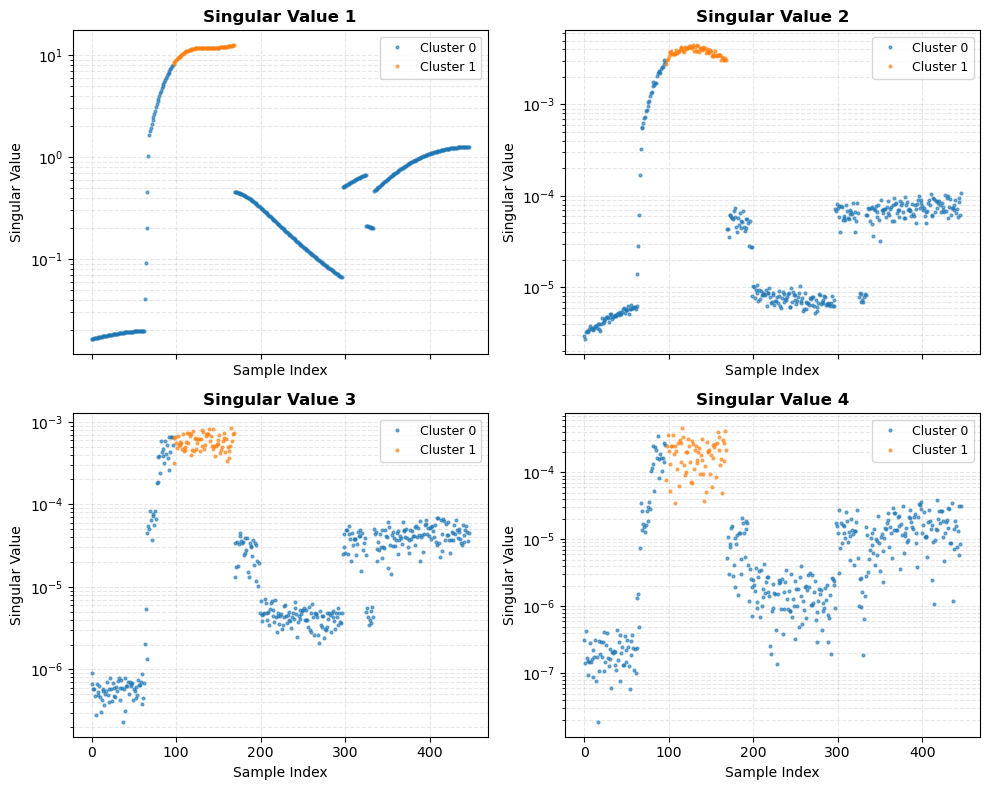

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


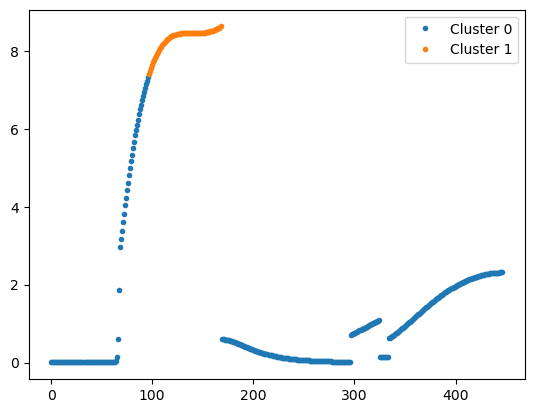

Original number of samples: 447
Number of samples after cleaning: 375


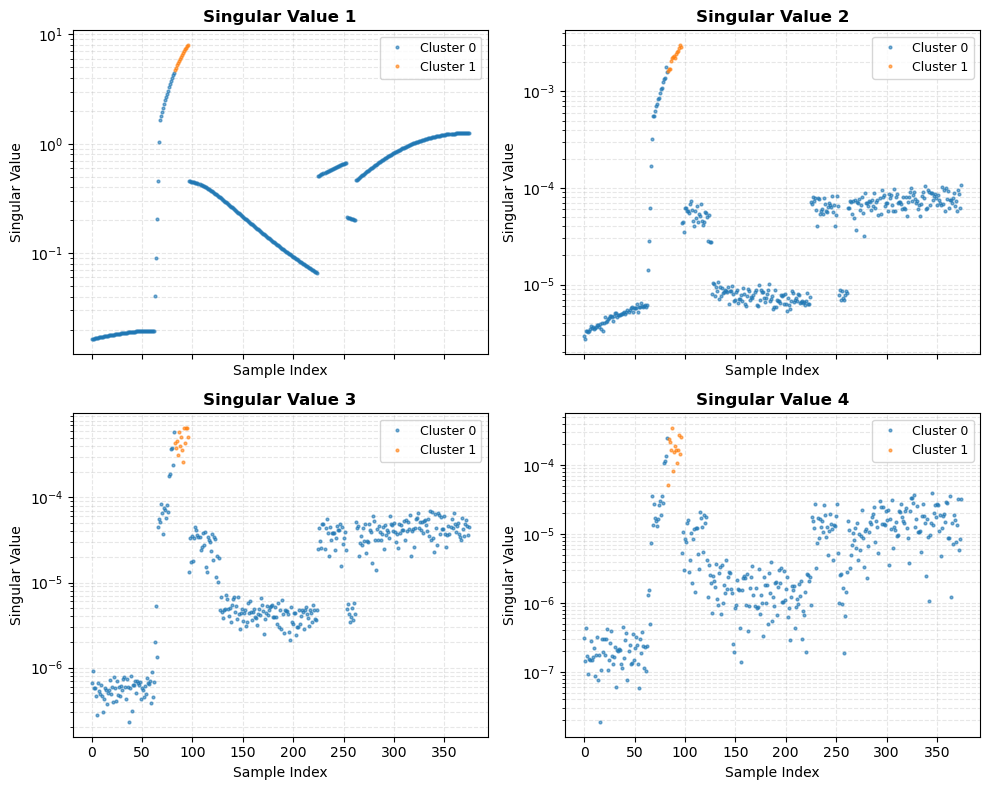

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


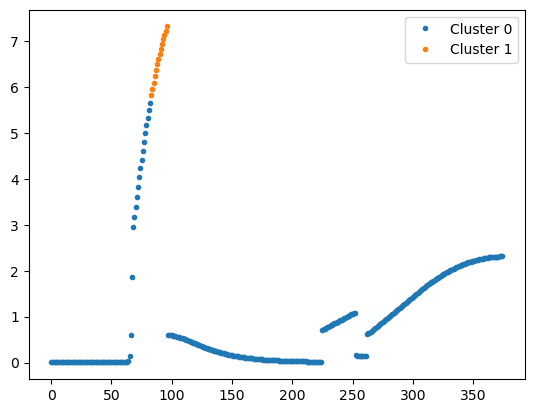

Original number of samples: 375
Number of samples after cleaning: 361


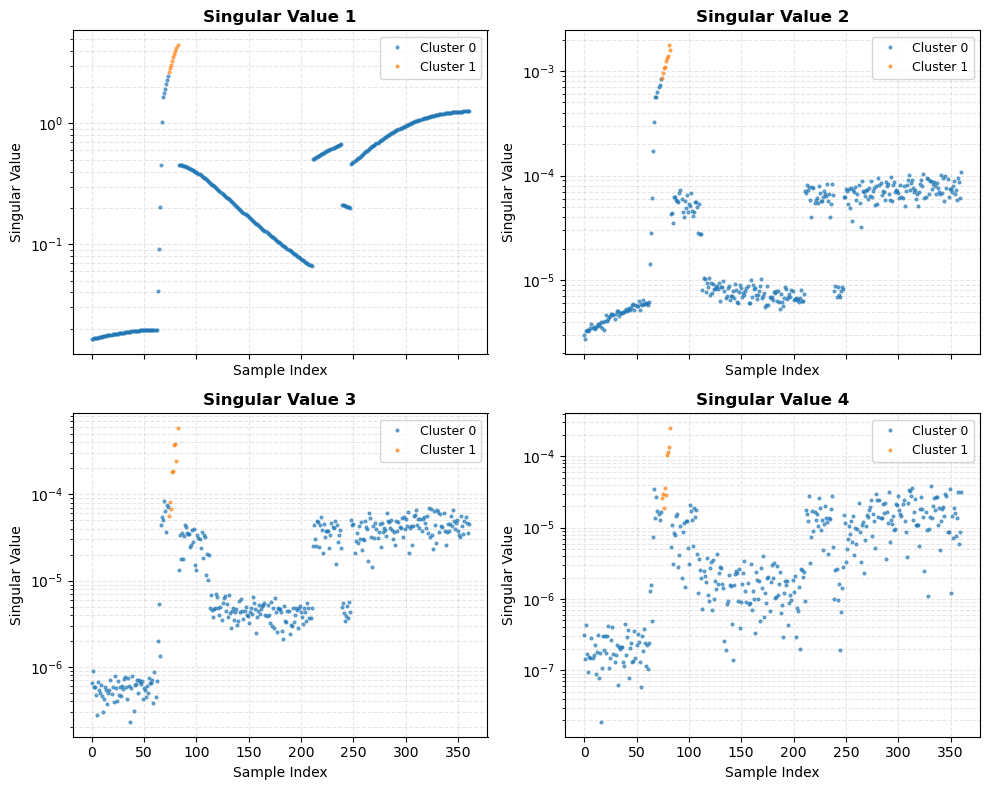

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


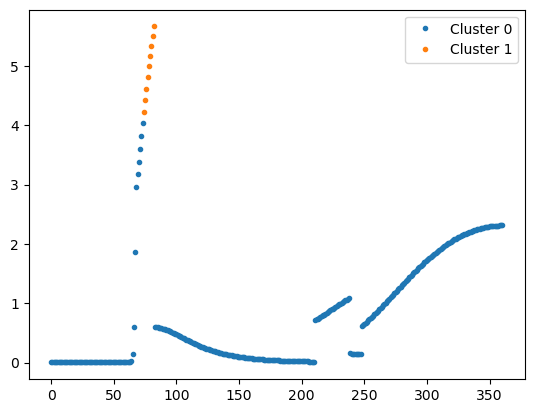

Original number of samples: 361
Number of samples after cleaning: 352


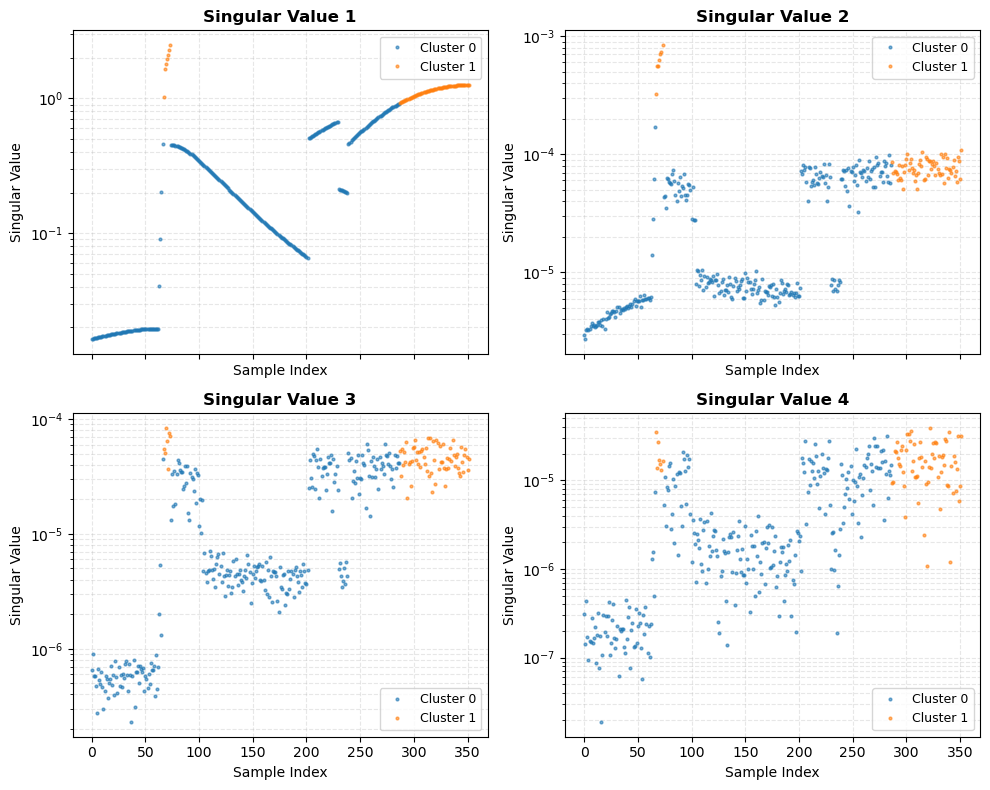

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


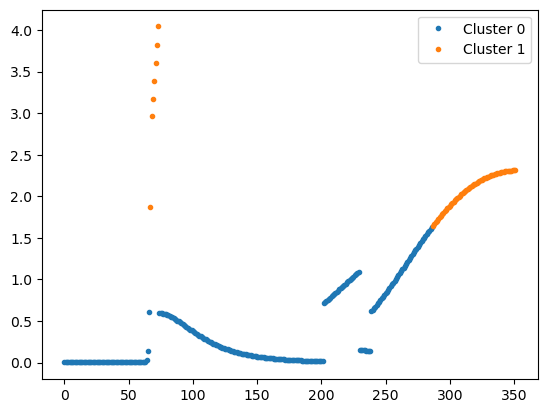

Original number of samples: 352
Number of samples after cleaning: 280


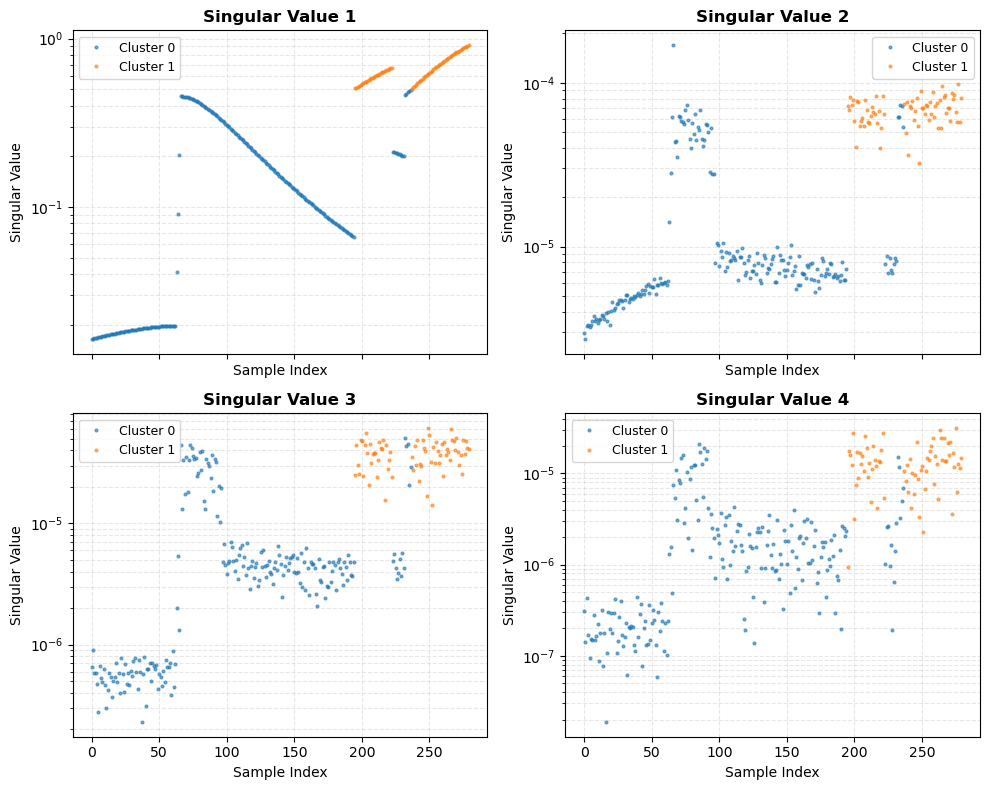

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


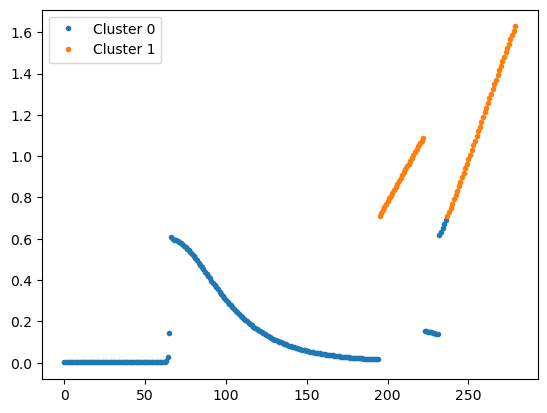

Original number of samples: 280
Number of samples after cleaning: 209


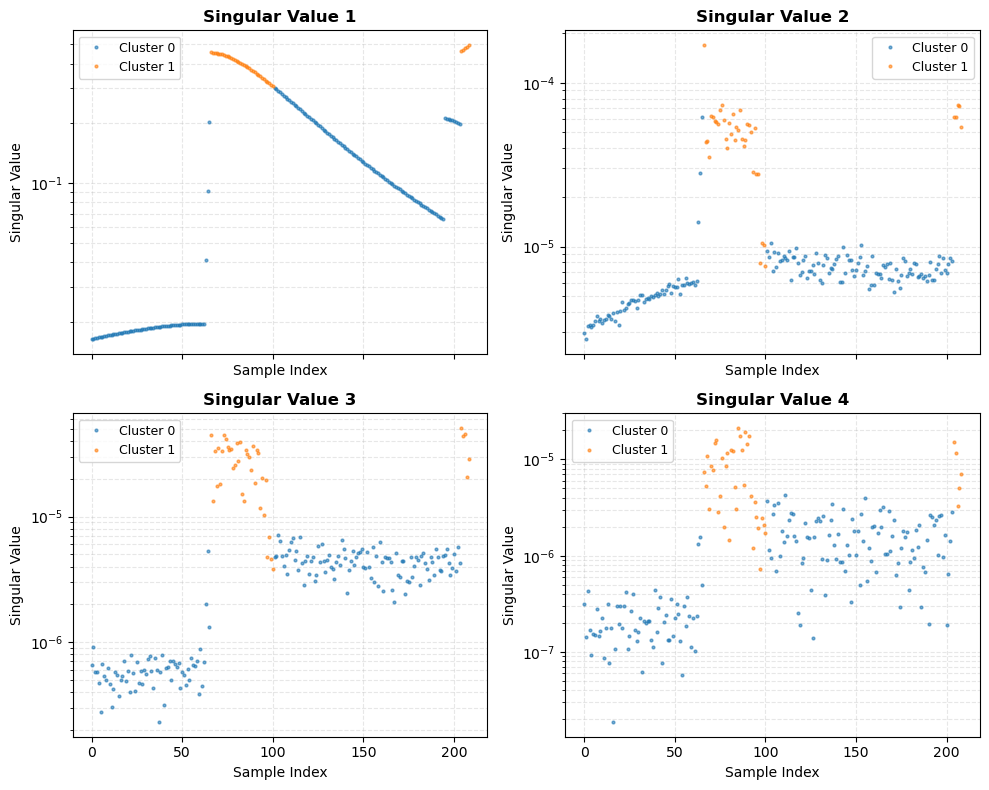

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


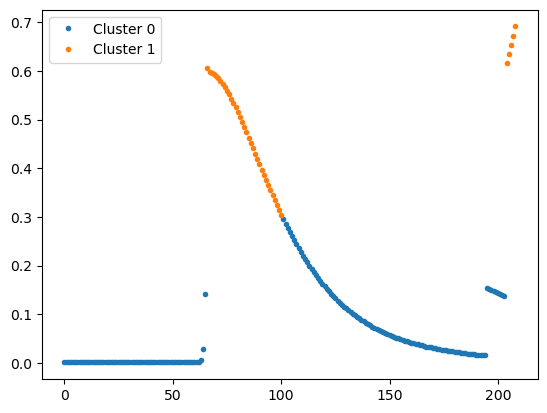

Original number of samples: 209
Number of samples after cleaning: 169


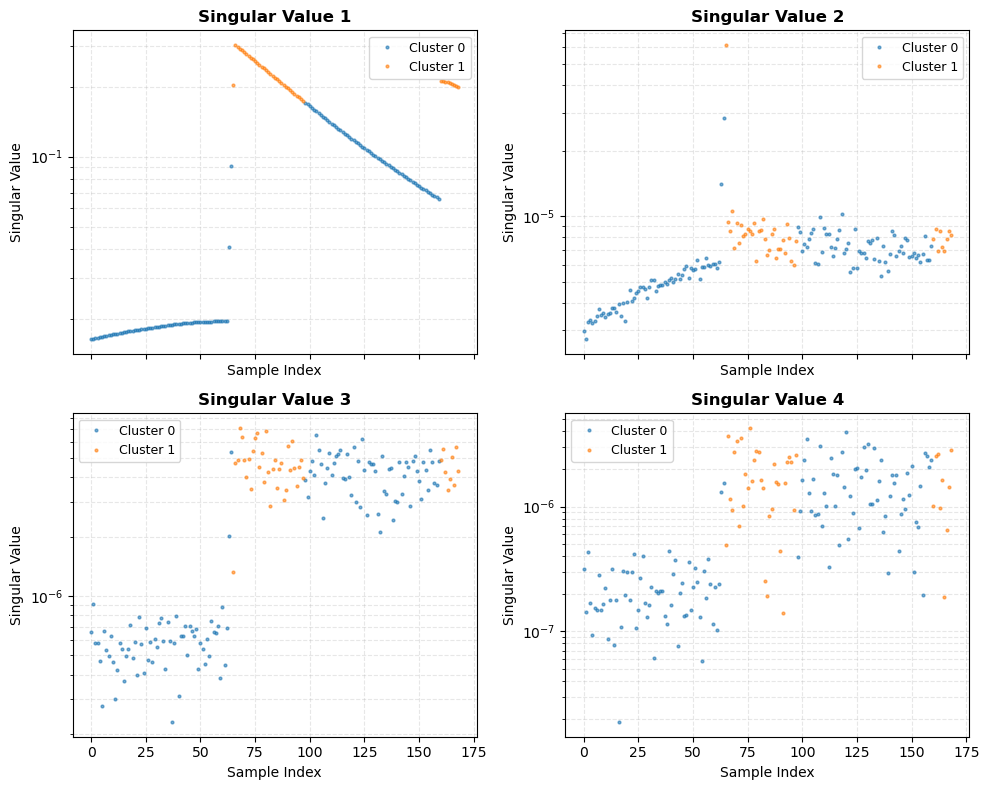

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


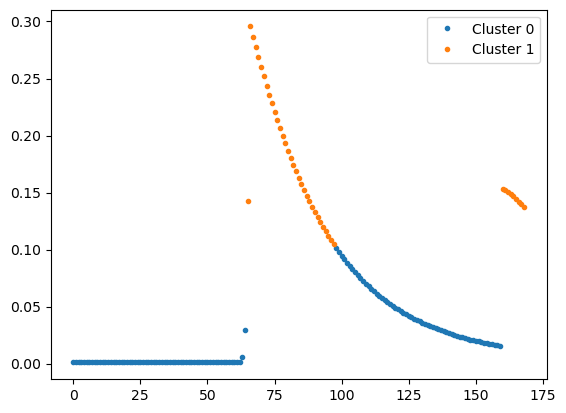

Original number of samples: 169
Number of samples after cleaning: 127


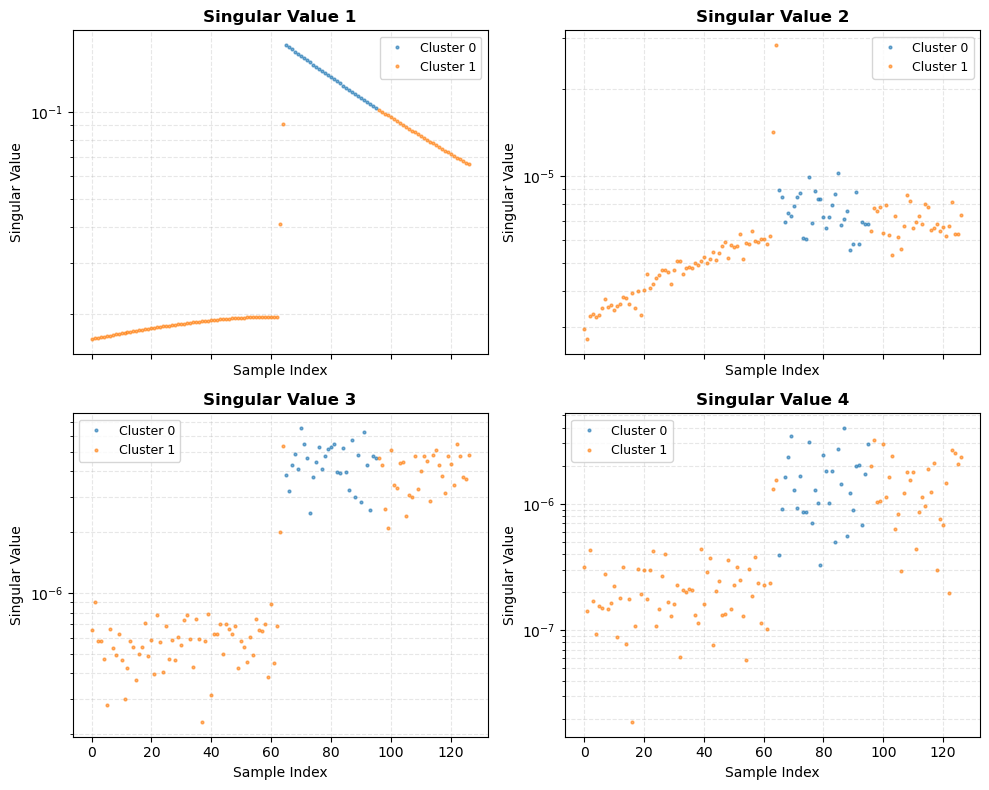

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


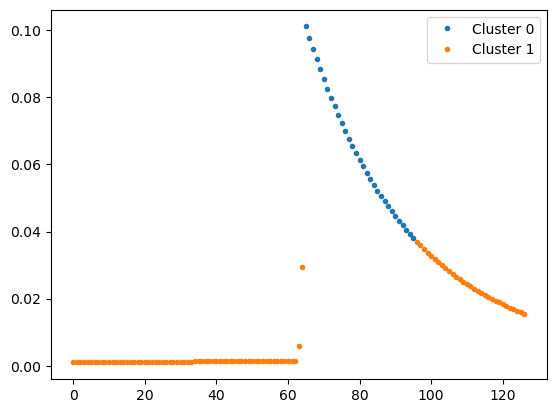

Original number of samples: 127
Number of samples after cleaning: 31


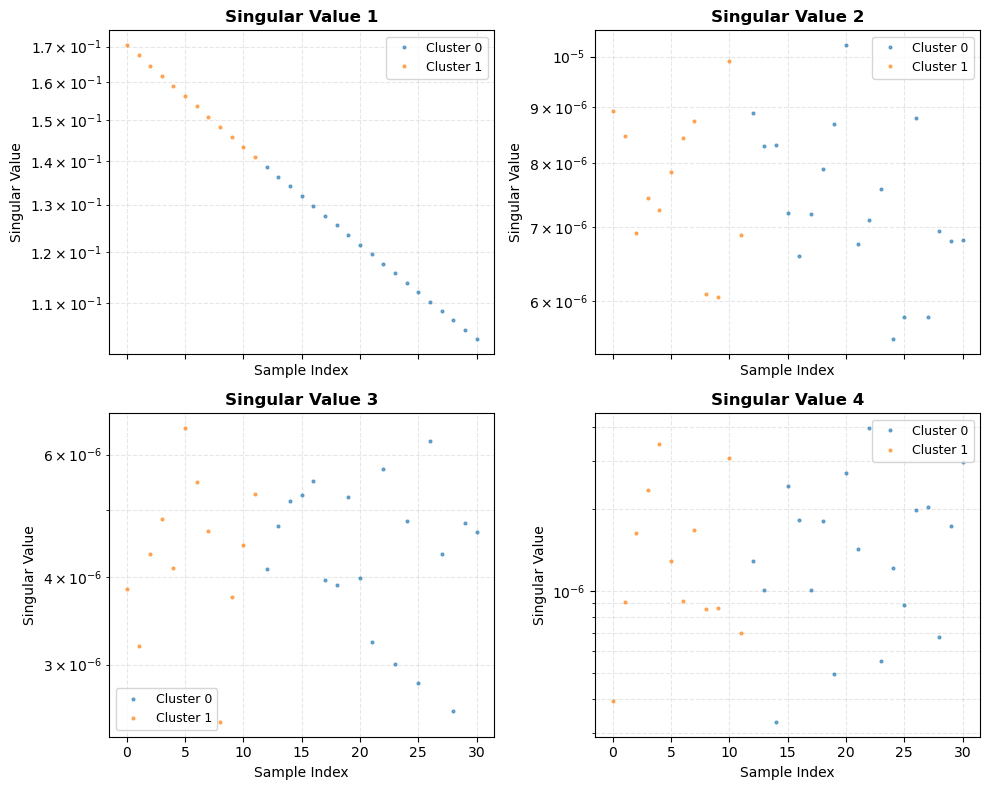

/var/folders/m4/118lpvmd05q63v2lh_ldv3xr0000gp/T/ipykernel_28806/3980399525.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  capacity_arr[i] = cap


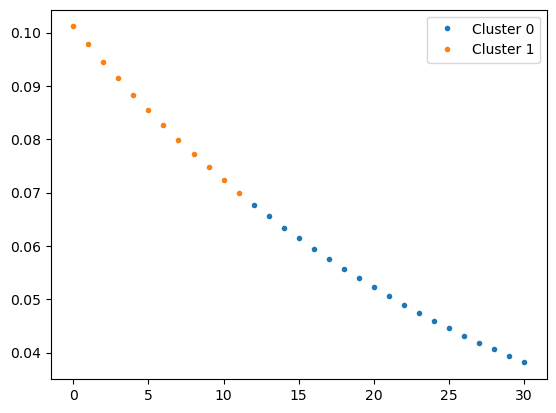

Original number of samples: 31
Number of samples after cleaning: 19


In [50]:
data = np.load('0_5_60.npz')
H_matrices = data['matrices']

H_matrices = H_matrices[~np.isnan(H_matrices).any(axis=(1,2))]
H_matrices = H_matrices[:500]
H_matrices = regularize_data(H_matrices)
# H_matrices = add_noise(H_matrices, noise_level=0.1)
sv_data = compute_SV(H_matrices)
labels, centers = clustering_alg(H_matrices, n_clusters=2)
plot_SV(sv_data, labels)
capacity_data = capacity_Vector(H_matrices)
plot_Capacity(capacity_data, labels)

for i in range(10):
    sv_data = compute_SV(H_matrices)
    labels, centers = clustering_alg(H_matrices, n_clusters=2)
    plot_SV(sv_data, labels)
    capacity_data = capacity_Vector(H_matrices)
    plot_Capacity(capacity_data, labels)
    print(f'Original number of samples: {H_matrices.shape[0]}')
    H_matrices = H_matrices[labels != 1]
    print(f'Number of samples after cleaning: {H_matrices.shape[0]}')

In [51]:
# remove all samples belonging to cluster 1
cleaned_matrices = H_matrices[labels != 1]
print(f'Original number of samples: {H_matrices.shape[0]}')
print(f'Number of samples after cleaning: {cleaned_matrices.shape[0]}')

sv_arr = compute_SV(cleaned_matrices)

plot_SV(sv_arr)

labels, centers = clustering_alg(cleaned_matrices, n_clusters=2)
plot_SV(sv_arr, labels)

capacities = capacity_Vector(cleaned_matrices)
plot_Capacity(capacities, labels)



IndexError: boolean index did not match indexed array along axis 0; size of axis is 19 but size of corresponding boolean axis is 31